In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'tanh', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0539 - accuracy: 0.3774 - val_loss: 0.0272 - val_accuracy: 0.3895
Epoch 2/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0243 - accuracy: 0.4427 - val_loss: 0.0217 - val_accuracy: 0.5066
Epoch 3/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0205 - accuracy: 0.5370 - val_loss: 0.0194 - val_accuracy: 0.5595
Epoch 4/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0188 - accuracy: 0.5608 - val_loss: 0.0183 - val_accuracy: 0.5618
Epoch 5/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0178 - accuracy: 0.5752 - val_loss: 0.0174 - val_accuracy: 0.5727
Epoch 6/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0171 - accuracy: 0.5856 - val_loss: 0.0169 - val_accuracy: 0.5781
Epoch 7/50
50000/50000 [==============================] - 80s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RTAM.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : deer


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 4


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
40,4,deer,0.460064,0.659241,1.942648,0.721003,0.000000,0.207066,0.000000,0.594572,...,1.412103,1.777619,2.150979,0.882654,0.692893,1.187502,1.241942,0.910337,1.000000,0.000000
3870,8,ship,0.348889,0.635954,1.870495,0.406816,0.000000,0.166869,0.118444,0.841139,...,0.941239,1.429962,2.494362,0.854780,0.421624,0.690428,0.911555,1.039338,0.980544,0.019456
2245,8,ship,0.437869,0.563044,1.888232,0.454825,0.000000,0.192936,0.052038,0.786324,...,1.113814,1.428314,2.235055,0.814966,0.524603,0.955362,0.933715,1.226153,0.980199,0.019801
8103,7,horse,0.239223,0.731421,1.797131,0.578038,0.000000,0.061317,0.192821,0.731953,...,0.898522,1.662930,2.683459,0.871065,0.679463,0.704125,1.113498,1.207835,0.979554,0.020446
2110,0,airplane,0.344967,0.515556,1.601754,0.250804,0.000000,0.220699,0.415399,0.943354,...,0.998442,1.270162,2.196192,0.868788,0.499600,1.174477,1.134252,1.008217,0.979485,0.020515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,4,deer,0.476362,0.254263,0.265397,0.625542,0.039535,0.986407,0.610873,0.282841,...,1.176581,0.951869,0.957502,0.941357,0.681852,1.736957,1.163226,0.640106,0.807728,0.192272
9765,4,deer,0.378314,0.285992,0.060438,0.647390,0.264594,0.972172,0.572185,0.069883,...,1.019343,1.521636,1.484264,0.777081,0.596951,1.515852,1.232682,0.780854,0.805013,0.194987
872,4,deer,0.377485,0.289122,0.066855,0.649296,0.262711,0.969303,0.568640,0.071280,...,1.049210,1.191947,1.618512,0.808582,0.792402,1.372418,1.421334,0.907220,0.804928,0.195072
8244,4,deer,0.378420,0.287201,0.063033,0.647192,0.262762,0.970943,0.570839,0.072613,...,1.058726,1.198532,1.368087,0.959248,0.770070,1.689557,1.193952,1.011788,0.800025,0.199975


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

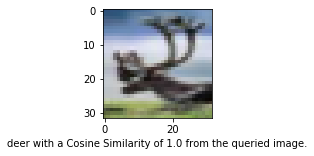

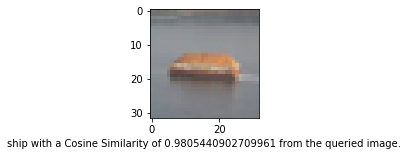

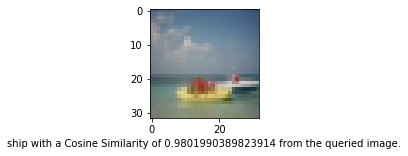

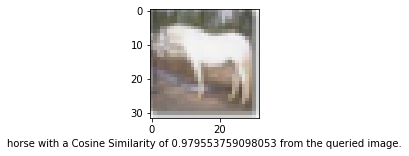

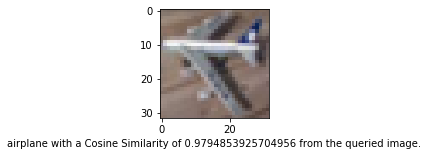

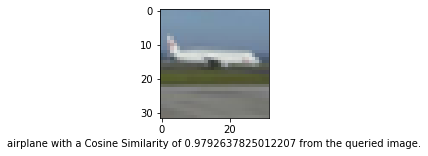

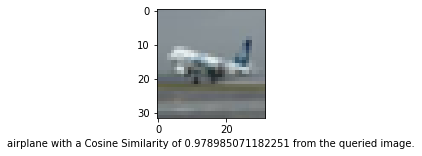

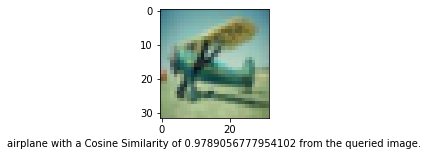

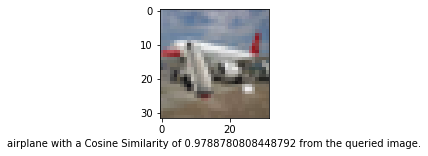

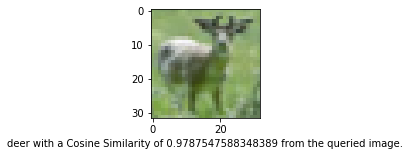

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
40,4,deer,0.460064,0.659241,1.942648,0.721003,0.000000,0.207066,0.000000,0.594572,...,1.777619,2.150979,0.882654,0.692893,1.187502,1.241942,0.910337,1.000000,0.000000,0.000000
8103,7,horse,0.239223,0.731421,1.797131,0.578038,0.000000,0.061317,0.192821,0.731953,...,1.662930,2.683459,0.871065,0.679463,0.704125,1.113498,1.207835,0.979554,0.020446,3.010317
2548,0,airplane,0.560040,0.488280,2.215963,0.668560,0.000000,0.034476,0.013064,0.703387,...,1.533251,2.545718,0.881902,0.623635,1.150604,1.071995,1.192792,0.978906,0.021094,3.076466
2616,1,automobile,0.473527,0.416610,2.472712,0.220013,0.000000,0.000000,0.254719,1.090311,...,1.292732,2.452774,1.174711,0.947916,1.310028,0.896080,0.781654,0.977786,0.022214,3.124811
2109,0,airplane,0.594020,0.414587,2.194545,0.501250,0.000000,0.101886,0.075868,0.851737,...,1.461340,2.300244,0.763049,0.373926,1.003745,1.013785,1.024396,0.979264,0.020736,3.140076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,4,deer,0.476362,0.254263,0.265397,0.625542,0.039535,0.986407,0.610873,0.282841,...,0.951869,0.957502,0.941357,0.681852,1.736957,1.163226,0.640106,0.807728,0.192272,8.949936
9246,3,cat,0.358758,0.330855,0.066722,0.630409,0.238322,0.975014,0.520413,0.090643,...,0.909927,2.076183,0.794286,1.012298,2.012126,2.075639,1.414116,0.799980,0.200020,8.963187
9765,4,deer,0.378314,0.285992,0.060438,0.647390,0.264594,0.972172,0.572185,0.069883,...,1.521636,1.484264,0.777081,0.596951,1.515852,1.232682,0.780854,0.805013,0.194987,9.051278
872,4,deer,0.377485,0.289122,0.066855,0.649296,0.262711,0.969303,0.568640,0.071280,...,1.191947,1.618512,0.808582,0.792402,1.372418,1.421334,0.907220,0.804928,0.195072,9.062824


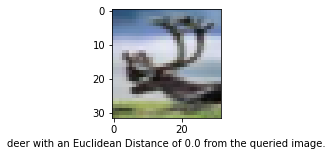

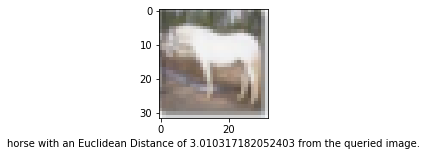

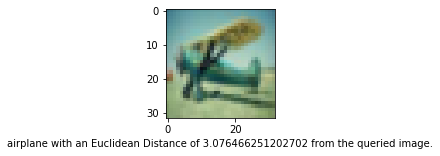

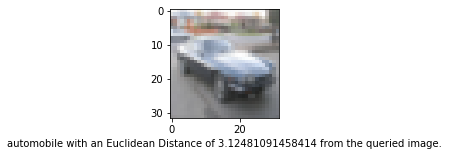

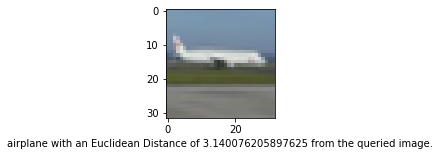

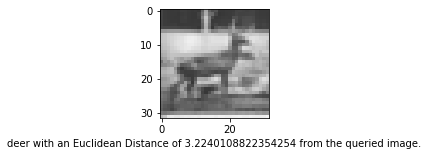

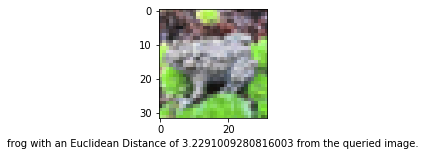

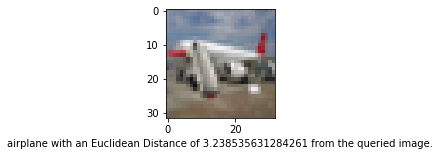

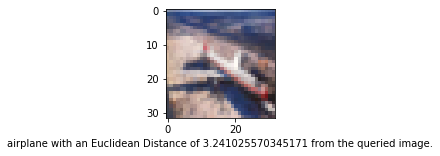

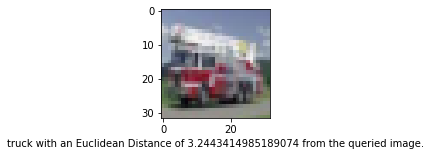

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()